# Explorative Data Analysis (EDA) Bike Sharing in Washington D.C.

## Import modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [3]:
df = pd.read_csv('Data/hour.csv')

## First exploration

In [3]:
df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [4]:
df['dteday'].iloc[0], df['dteday'].iloc[-1]

('2011-01-01', '2012-12-31')

In [5]:
df['casual'].sum(), df['registered'].sum()

(620017, 2672662)

### Results from first exploration
- 17379 datapoints
- 17 columns: instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt
- except for dteday (object) all variables have a numeric format (int64 or flaot64)
- no missing values
- time range 01.01.2011 to 31.12.2012 with hourly granularity, hours in separate column from 0 to 23
- temperature indicated under temp and atemp (felt temperature) between 0.02/0.00 und 1; value in Celsius was normalized with the following formula: (t-tmin)/(tmax-tmin)
- registered users show considerable higher usage counts than casual users

## Data cleansing

### Missing values

In [10]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

no missing values

### Data preparation

In [6]:
df['hr'] = df['hr'].apply(lambda x: "{0:0=2d}".format(x)+ ':00:00')
df['dtedaytime'] = df['dteday'] + ' ' + df['hr']

In [7]:
df['dtedaytime'] = pd.to_datetime(df['dtedaytime'], format='%Y-%m-%d %H:%M:%S')

In [8]:
df = df.set_index('dtedaytime')
df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dtedaytime,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,2011-01-01,1,0,1,00:00:00,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2011-01-01 01:00:00,2,2011-01-01,1,0,1,01:00:00,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2011-01-01 02:00:00,3,2011-01-01,1,0,1,02:00:00,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
2011-01-01 03:00:00,4,2011-01-01,1,0,1,03:00:00,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
2011-01-01 04:00:00,5,2011-01-01,1,0,1,04:00:00,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [9]:
df = df.drop(['instant', 'dteday', 'yr', 'mnth', 'hr', 'weekday', 'atemp'], axis=1)
df.head(5)

,season,holiday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
dtedaytime,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,0.24,0.81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,0.22,0.80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,0.22,0.80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,0.24,0.75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,0.24,0.75,0.0,0,1,1


## Explorative Data Analysis

### Exploration of time-related patterns

over the day

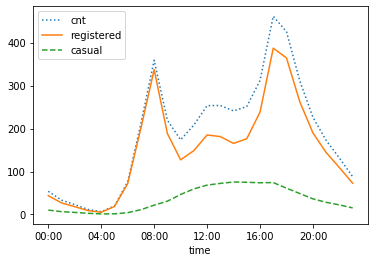

In [11]:
df_bytime = df[['cnt', 'registered', 'casual']].groupby(df.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
df_bytime.plot(xticks=hourly_ticks, style=[':','-','--']);

over the week

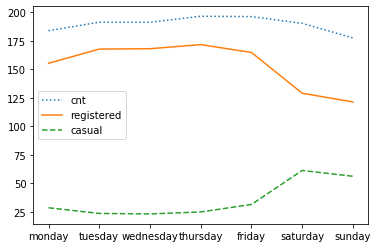

In [18]:
df_byweekday = df[['cnt', 'registered', 'casual']].groupby(df.index.weekday).mean();
df_byweekday.index = ['monday','tuesday','wednesday', 'thursday', 'friday', 'saturday', 'sunday']
df_byweekday.plot(style=[':','-','--']);

workingday - sparetime

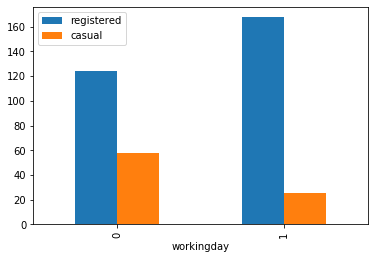

In [39]:
df.groupby('workingday')[['registered', 'casual']].mean().plot.bar();

over the year

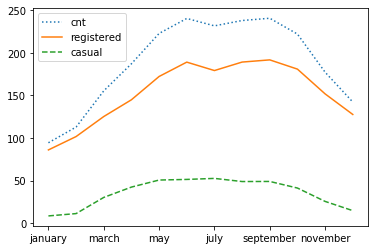

In [19]:
df_bymonth = df[['cnt', 'registered', 'casual']].groupby(df.index.month).mean();
df_bymonth.index = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']
df_bymonth.plot(style=[':','-','--']);

from year to year

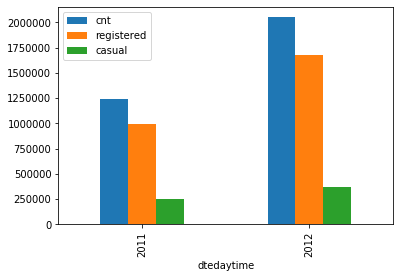

In [20]:
df.groupby(df.index.year)[['cnt', 'registered', 'casual']].sum().plot.bar();

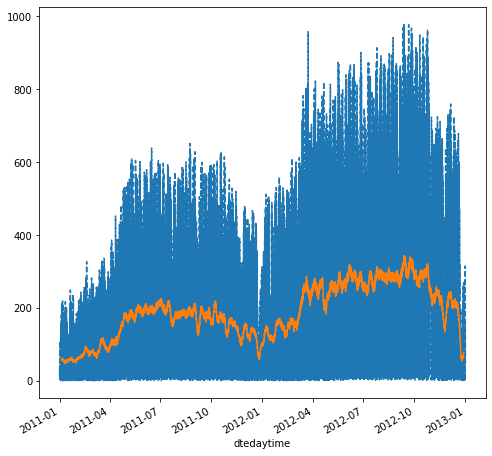

In [30]:
df['cnt'].plot(figsize=(8,8), style='--');
rollavg = df['cnt'].rolling(150, center=True).mean()
rollavg.plot(figsize=(8,8));

### Summary to time-related patterns

- with the registered users the usage significantly increases at the rush hours in the morning and evening. 
- for the casual users this pattern is absent; the daily pattern of this user group shows a slight increase towards the afternoon  which decreases again towards the evening
- the pattern between casual and registered users also differs with respect to the course of the week. The usage counts for the registered users are higher during the week and decrease at the weekend. In contrast the usage counts for the casual users show a reversed pattern. 
- these results correspond to the pattern of mean usage counts between workingdays and non-workingdays. Registered users use the bikes more often on workingdays while casual users show higher usage counts on non-workingdays.
- a possible interpretation of these results could be, that registered users more often use the bikes for their way from and to work and casual users more often lend the bikes for their sparetime activities
- considering the course of the year the patterns of both user groups are similar: we see an increase towards the summer months while the usage counts decrease towards the winter months
- overall, comparing the usage counts between 2011 and 2012 we see a significant increase also when regular variablities are accounted for

### Exploring the influence of environmental factors

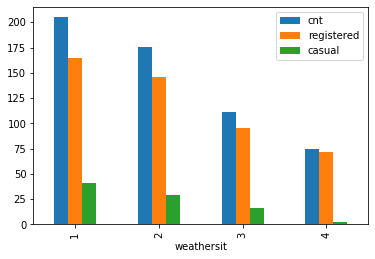

In [26]:
df.groupby('weathersit')[['cnt', 'registered', 'casual']].mean().plot.bar();

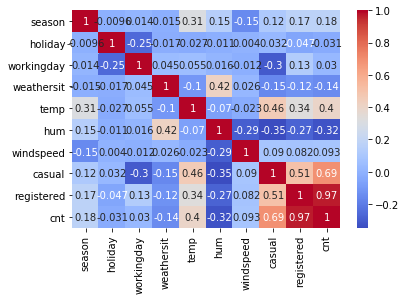

In [27]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm');

In [36]:
df[['registered', 'casual', 'hum', 'temp']].corr().style.background_gradient(cmap='coolwarm', axis=None)

,registered,casual,hum,temp
registered,1.000000,0.506618,-0.273933,0.335361
casual,0.506618,1.000000,-0.347028,0.459616
hum,-0.273933,-0.347028,1.000000,-0.069881
temp,0.335361,0.459616,-0.069881,1.000000


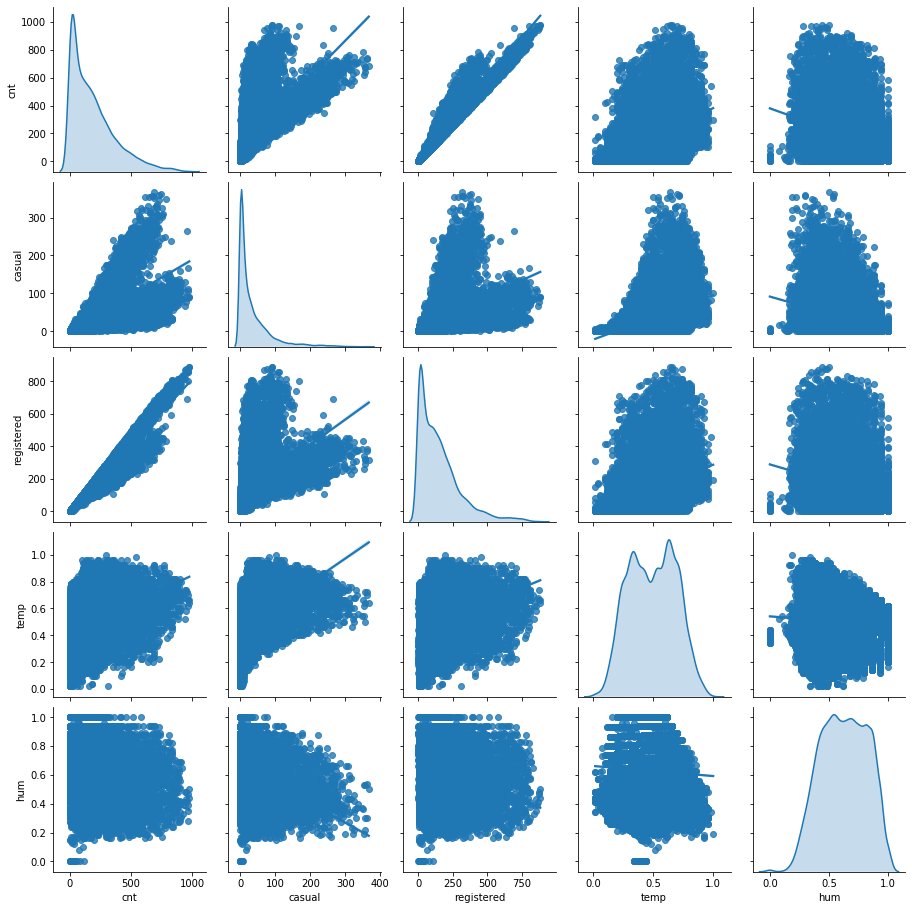

In [28]:
sns.pairplot(df, 
             vars=['cnt', 'casual', 'registered', 'temp', 'hum'], 
             kind='reg', 
             diag_kind='kde');

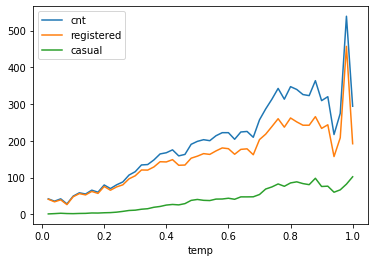

In [10]:
df.set_index('temp').groupby('temp')[['cnt', 'registered', 'casual']].mean().plot();

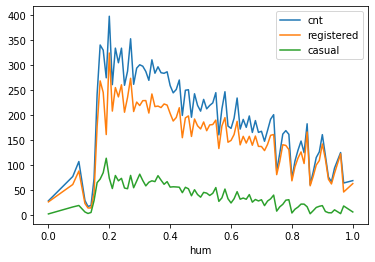

In [11]:
df.set_index('hum').groupby('hum')[['cnt', 'registered', 'casual']].mean().plot();

### Summary on environmental influencing factors

- The usage counts are influenced by the weather situation. They are higher with fair weather and decrease with worse weather situations.
- The correlation analysis shows higher correlation coefficients for humidity (negative) and temperature (positive) with respect to the usage counts for both user groups. The higher the temperature the higher also the usage counts. Concerning the humidity lower values are connected with higher usage counts.
- Correlation coefficients both for humidity and temperature are a bit higher for the casual users compared to the registered users. Thus this user group is still more influenced in their usage pattern by environmental factors.

## Overall summary

- Regular variabilities can be observed when different timespans (i.e. daily, weekly etc.) are considered. The obvious patterns differ between casual and registered users. The differences mirror the workrelated usage motivation of the registered users and the more recreational usage motivation of the casual users.
- Both user groups are influenced by environmental factors in there usage patterns, mainly the overall weather situation, season, humidity and temperature.
- Casual users are slightly  more responsive for the weather situation which corresponds to their recreational usage motivation.

